Nama : Rully Lukas T

NIM : 1103200181

Dataset : IT Salary Survey EU  2020.csv

In [ ]:
# Import library yang diperlukan
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import Data

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path file
file_path = "/content/drive/MyDrive/Dataset_ML/IT Salary Survey EU  2020.csv"

# Read dataset as dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


#Explore Data

In [ ]:
# info ringkas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
# mendapatkan sumary statistik dataframe
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


#Cleansing

In [ ]:
# Membuat peta penamaan fitur yang baru
nama_fitur_singkat = {
    'Timestamp': 'Timestamp',
    'Age': 'Age',
    'Gender': 'Gender',
    'City': 'City',
    'Position': 'Position',
    'Total years of experience': 'Total Exp.',
    'Years of experience in Germany': 'Exp. in Grmany',
    'Seniority level': 'Seniority',
    'Your main technology / programming language': 'Main Tech',
    'Other technologies/programming languages you use often': 'Other Tech',
    'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly Salary',
    'Yearly bonus + stocks in EUR': 'Bonus + Stocks',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'Last Year Salary',
    'Annual bonus+stocks one year ago. Only answer if staying in same country': 'Last Year Bonus + Stocks',
    'Number of vacation days': 'Vacation Days',
    'Employment status': 'Employment',
    'Сontract duration': 'Contract Dur.',
    'Main language at work': 'Main Lang.',
    'Company size': 'Company Size',
    'Company type': 'Company Type',
    'Have you lost your job due to the coronavirus outbreak?': 'Lost Job (COVID)',
    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'Short Working Hrs',
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR': 'WFH Support'
}

# Mengganti nama fitur dalam dataframe
df.rename(columns=nama_fitur_singkat, inplace=True)

In [ ]:
# Menampilkan nama fitur yang sudah diganti
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 1253 non-null   object 
 1   Age                       1226 non-null   float64
 2   Gender                    1243 non-null   object 
 3   City                      1253 non-null   object 
 4   Position                  1247 non-null   object 
 5   Total Exp.                1237 non-null   object 
 6   Exp. in Grmany            1221 non-null   object 
 7   Seniority                 1241 non-null   object 
 8   Main Tech                 1126 non-null   object 
 9   Other Tech                1096 non-null   object 
 10  Yearly Salary             1253 non-null   float64
 11  Bonus + Stocks            829 non-null    object 
 12  Last Year Salary          885 non-null    float64
 13  Last Year Bonus + Stocks  614 non-null    object 
 14  Vacation

In [ ]:
# Memilih fitur-fitur yang ingin diubah tipe datanya
selected_features = [
    "Total Exp.",
    "Exp. in Grmany",
    "Bonus + Stocks",
    "Last Year Bonus + Stocks",
    "Vacation Days"
]

# Mengubah tipe data fitur-fitur yang dipilih menjadi numerik
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Menampilkan tipe data setelah perubahan
df[selected_features].dtypes


Total Exp.                  float64
Exp. in Grmany              float64
Bonus + Stocks              float64
Last Year Bonus + Stocks    float64
Vacation Days               float64
dtype: object

In [ ]:
# Mengidentifikasi baris yang memiliki nilai null
rows_with_null = df[df.isnull().any(axis=1)]

# Menampilkan baris yang memiliki nilai null
rows_with_null

,Timestamp,Age,Gender,City,Position,Total Exp.,Exp. in Grmany,Seniority,Main Tech,Other Tech,...,Last Year Bonus + Stocks,Vacation Days,Employment,Contract Dur.,Main Lang.,Company Size,Company Type,Lost Job (COVID),Short Working Hrs,WFH Support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,NaN,...,5000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,NaN,...,NaN,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7.0,2.0,Senior,PHP,PHP,...,NaN,25.0,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,1.5,Senior,consumer analysis,NaN,...,2500.0,NaN,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN


In [ ]:
# Mengisi nilai kosong dalam DataFrame dengan nilai tertentu, misalnya 0
df_filled = df.fillna(0)

# Menampilkan lima baris pertama setelah mengisi nilai kosong
df_filled.head()

,Timestamp,Age,Gender,City,Position,Total Exp.,Exp. in Grmany,Seniority,Main Tech,Other Tech,...,Last Year Bonus + Stocks,Vacation Days,Employment,Contract Dur.,Main Lang.,Company Size,Company Type,Lost Job (COVID),Short Working Hrs,WFH Support
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No,0.0,0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,0,...,5000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0.0,0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,0,...,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.0,0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",...,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0


In [ ]:
# melihat informasi tentang dataframe apakah masi ada null atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 1253 non-null   object 
 1   Age                       1226 non-null   float64
 2   Gender                    1243 non-null   object 
 3   City                      1253 non-null   object 
 4   Position                  1247 non-null   object 
 5   Total Exp.                1230 non-null   float64
 6   Exp. in Grmany            1194 non-null   float64
 7   Seniority                 1241 non-null   object 
 8   Main Tech                 1126 non-null   object 
 9   Other Tech                1096 non-null   object 
 10  Yearly Salary             1253 non-null   float64
 11  Bonus + Stocks            823 non-null    float64
 12  Last Year Salary          885 non-null    float64
 13  Last Year Bonus + Stocks  612 non-null    float64
 14  Vacation

#Visualize

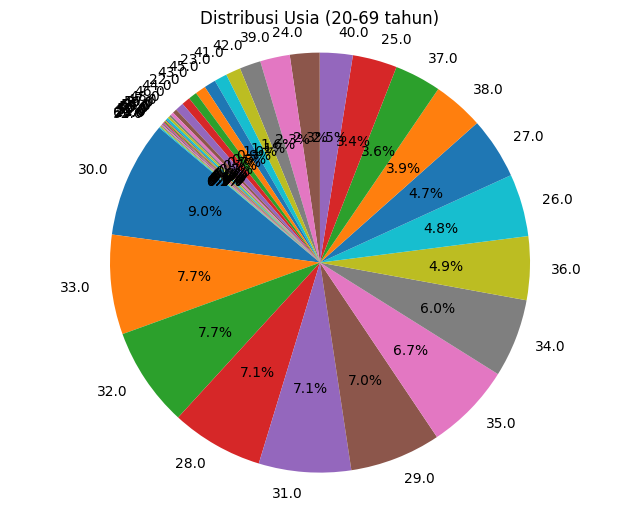

In [ ]:
# Memfilter baris berdasarkan rentang usia (20-69)
filtered_df = df[(df['Age'] >= 20) & (df['Age'] <= 69)]

# Menghitung jumlah individu dalam setiap kelompok usia
age_counts = filtered_df['Age'].value_counts()

# Memplot diagram pie
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Usia (20-69 tahun)')
plt.axis('equal')  # Membuat lingkaran menjadi proporsional
plt.show()

In [ ]:
# Memilih baris data yang memiliki usia antara 51 dan 60 atau di atas 60
selected_rows = df.loc[(df['Age'] >= 51) & (df['Age'] <= 60) | (df['Age'] > 60)]

# Menampilkan baris data yang dipilih
selected_rows


,Timestamp,Age,Gender,City,Position,Total Exp.,Exp. in Grmany,Seniority,Main Tech,Other Tech,...,Last Year Bonus + Stocks,Vacation Days,Employment,Contract Dur.,Main Lang.,Company Size,Company Type,Lost Job (COVID),Short Working Hrs,WFH Support
23,24/11/2020 11:23:11,59.0,Male,Berlin,Backend Developer,30.0,30.0,Senior,Java,"Kotlin, Java / Scala, SQL",...,2000.0,28.0,Full-time employee,Unlimited contract,German,101-1000,Product,No,0.0,NaN
59,24/11/2020 11:33:51,66.0,Male,Munich,Software Engineer,40.0,4.0,Lead,ruby on rails,"Javascript / Typescript, Ruby, SQL",...,NaN,30.0,Full-time employee,Unlimited contract,German,51-100,Product,No,0.0,NaN
232,24/11/2020 13:53:01,56.0,Male,Ingolstadt,Software Engineer,9.0,9.0,Senior,R,"R, SQL",...,NaN,30.0,Full-time employee,Temporary contract,German,1000+,Product,No,NaN,NaN
233,24/11/2020 13:54:47,53.0,Male,Stuttgart,Frontend Developer,15.0,15.0,Senior,"Java, Javascript",Javascript / Typescript,...,NaN,NaN,Full-time employee,Unlimited contract,German,101-1000,Product,No,0.0,NaN
296,24/11/2020 15:39:13,65.0,Male,Berlin,Software Engineer,25.0,25.0,Senior,"Pascal, VB.NET, C#",".NET, SQL",...,NaN,30.0,Full-time employee,Unlimited contract,German,51-100,Product,No,NaN,NaN
673,25/11/2020 18:56:02,51.0,Male,Berlin,Software Engineer,30.0,30.0,Senior,"VB, RPA, Python","Python, PHP, Javascript / Typescript, .NET, SQ...",...,5000.0,30.0,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,NaN,NaN
955,30/11/2020 12:56:08,54.0,Male,Milano,Sales,31.0,6.0,Head,Network Automation,Python,...,100000.0,29.0,Full-time employee,Unlimited contract,English,11-50,Consulting / Agency,No,NaN,No
1103,06/12/2020 21:51:21,69.0,Male,Stuttgart,Rentner,383.0,3.0,Head,NaN,NaN,...,NaN,NaN,NaN,NaN,German,11-50,Consulting / Agency,No,NaN,NaN
1159,14/12/2020 08:55:24,56.0,Male,Munich,Software Engineer,30.0,19.0,Lead,c++,"Python, C/C++, Javascript / Typescript, Java /...",...,100000.0,25.0,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1182,20/12/2020 01:48:34,54.0,Male,Munich,Software Engineer,25.0,15.0,Middle,Python,"Python, C/C++, Javascript / Typescript, Java /...",...,500.0,29.0,Full-time employee,Unlimited contract,English,1000+,Consulting / Agency,No,30.0,1500


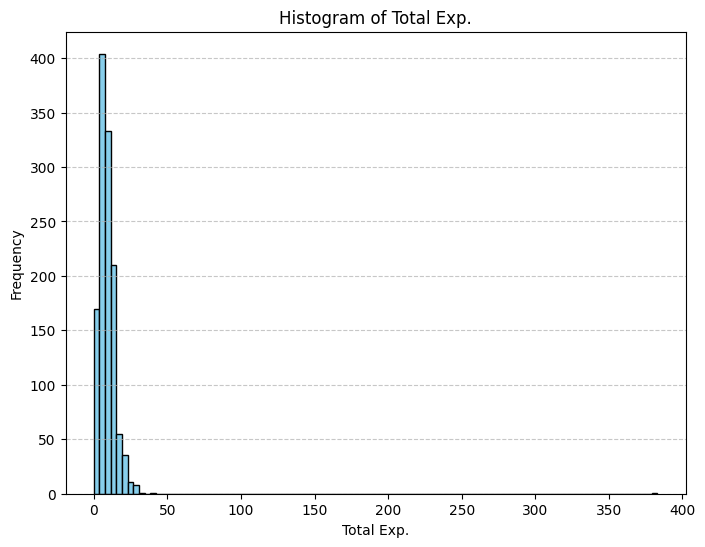

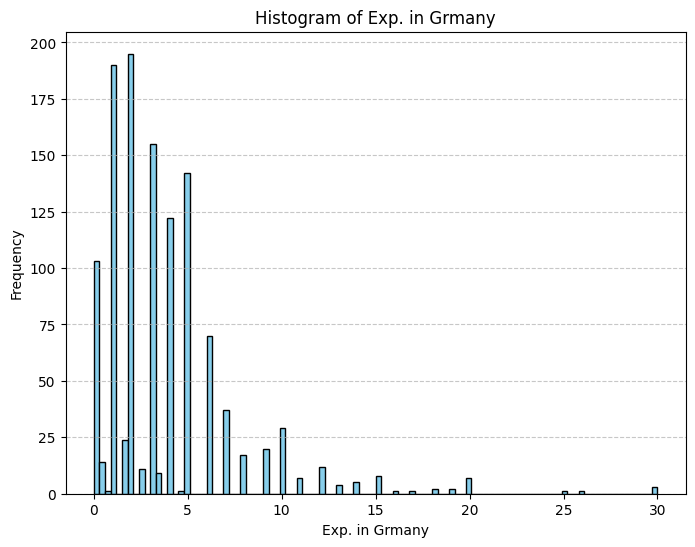

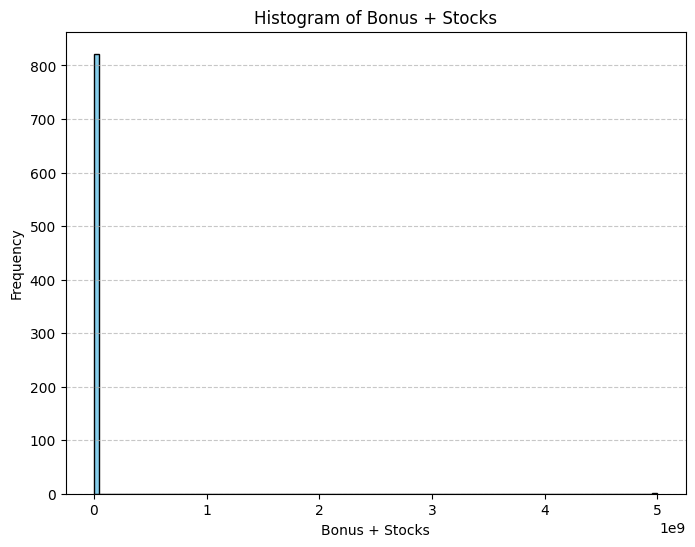

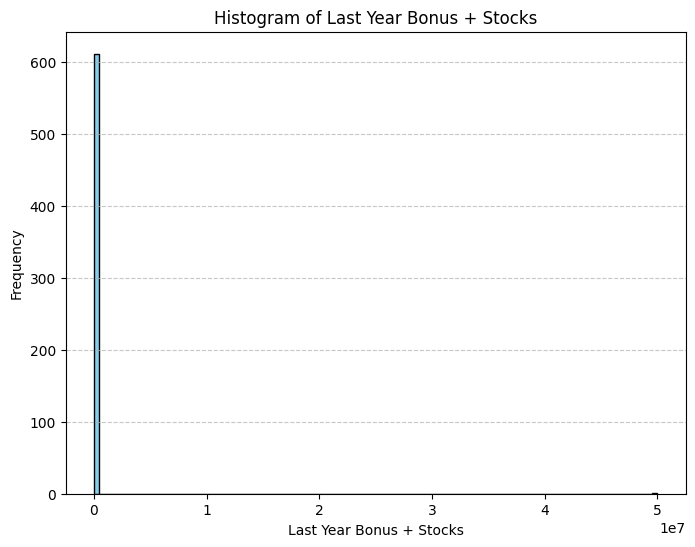

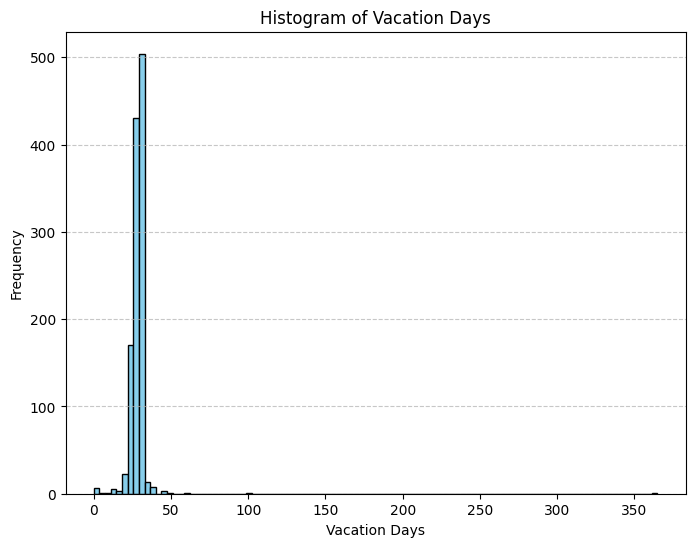

In [ ]:
numerik_features = [
    "Total Exp.",
    "Exp. in Grmany",
    "Bonus + Stocks",
    "Last Year Bonus + Stocks",
    "Vacation Days"
    ]

for feature in numerik_features:
    plt.figure(figsize=(8, 6))
    df[feature].plot(kind='hist', bins=100, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
